##### Problem Statement: In this project, machine learning and deep learning models will be applied to predict a movie’s revenue in the USA.

### 1-) Importing the Data and Libraries:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

# Reading the csv files
X1 = pd.read_csv('X1.csv')
X1.drop('Unnamed: 0', inplace=True, axis=1)
Y1 = pd.read_csv('Y1.csv', header=None, names =['revenue'])

# Creating the dataframe
df = X1
df['revenue'] = Y1

### 2-) Exploratory Data Analysis:

In [2]:
df.info() # let's look at the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3540 non-null   object 
 1   img_url          3540 non-null   object 
 2   description      3540 non-null   object 
 3   ratings          3540 non-null   float64
 4   n_votes          3540 non-null   float64
 5   is_adult         3540 non-null   int64  
 6   production_year  3540 non-null   int64  
 7   runtime          3540 non-null   object 
 8   genres           3540 non-null   object 
 9   release_year     3540 non-null   float64
 10  studio           3540 non-null   object 
 11  img_embeddings   3540 non-null   object 
 12  text_embeddings  3540 non-null   object 
 13  revenue          3540 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 387.3+ KB


In [3]:
df.head()

,title,img_url,description,ratings,n_votes,is_adult,production_year,runtime,genres,release_year,studio,img_embeddings,text_embeddings,revenue
0,Letters to Juliet,https://m.media-amazon.com/images/M/MV5BMjg0OT...,Letters to Juliet: Directed by Gary Winick. Wi...,6.5,92937.0,0,2010,105,"Adventure,Comedy,Drama",2010.0,Sum.,"[0.25030804, 2.4058464, 1.0431569, 0.030648155...","[-0.6795498, 0.35658365, 0.9994932, -0.9793934...",7.158530e+07
1,Veil of Tears,https://m.media-amazon.com/images/M/MV5BZjMxOD...,Veil of Tears: Directed by William Gereghty. W...,7.9,11.0,0,1996,\N,"Action,Crime,Drama",2014.0,WF,"[0.51250213, 2.8152602, 0.46308166, 0.29031387...","[-0.6202415, 0.31657028, 0.9992422, -0.9703722...",8.964834e+04
2,International Velvet,https://m.media-amazon.com/images/M/MV5BOGVkYj...,International Velvet: Directed by Bryan Forbes...,5.9,1345.0,0,1978,127,"Drama,Family,Sport",1978.0,MGM,"[0.18073043, 0.24735461, 0.63652813, 0.2496522...","[-0.709996, 0.4233521, 0.99980927, -0.98892415...",3.164907e+07
3,8 Seconds,https://m.media-amazon.com/images/M/MV5BYjY4Nz...,8 Seconds: Directed by John G. Avildsen. With ...,6.6,4851.0,0,1994,105,"Biography,Drama,Sport",1994.0,NL,"[0.025015268, 0.9105338, 0.3878257, 0.3421247,...","[-0.7416838, 0.38435012, 0.9998453, -0.9874693...",3.898197e+07
4,Penitentiary II,https://m.media-amazon.com/images/M/MV5BNjQyZW...,Penitentiary II: Directed by Jamaa Fanaka. Wit...,4.1,549.0,0,1982,108,"Crime,Drama,Sport",1982.0,MGM,"[0.19079691, 1.9068279, 0.29114372, 0.19527505...","[-0.65501904, 0.3845747, 0.9996712, -0.9766391...",9.697023e+06


In [4]:
# Checking for NaN values for each column
df.isna().sum()

title              0
img_url            0
description        0
ratings            0
n_votes            0
is_adult           0
production_year    0
runtime            0
genres             0
release_year       0
studio             0
img_embeddings     0
text_embeddings    0
revenue            0
dtype: int64

In [5]:
# Examining the columns that has object type data
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

title              3106
img_url            3057
description        3104
runtime             185
genres              352
studio              498
img_embeddings     3057
text_embeddings    3104
dtype: int64

In [6]:
# Analyzing the target column 'revenue'
df['revenue'].describe()

count    3.540000e+03
mean     2.808340e+07
std      7.322589e+07
min      1.303869e+02
25%      4.155345e+04
50%      5.019854e+05
75%      2.144866e+07
max      8.199476e+08
Name: revenue, dtype: float64

<AxesSubplot:>

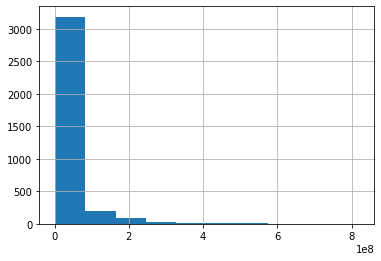

In [7]:
# Visualizing the target column
df['revenue'].hist()

### 3-) Data PreProcessing:

In [8]:
# 'title' column is irrelevant for this task, therefore it is going to be dropped
df = df.drop('title', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   img_url          3540 non-null   object 
 1   description      3540 non-null   object 
 2   ratings          3540 non-null   float64
 3   n_votes          3540 non-null   float64
 4   is_adult         3540 non-null   int64  
 5   production_year  3540 non-null   int64  
 6   runtime          3540 non-null   object 
 7   genres           3540 non-null   object 
 8   release_year     3540 non-null   float64
 9   studio           3540 non-null   object 
 10  img_embeddings   3540 non-null   object 
 11  text_embeddings  3540 non-null   object 
 12  revenue          3540 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 359.7+ KB


#### 3.1-) Label Encoding:

In [9]:
# We have columns which have object data type, we need to encode them
# I will split the df into three part:

# df1 is the columns that are float or int (no need to encode)
# df2 is the columns that are object (need to be encoded)
# df3 is the columns that are embedded columns (also need to be encoded but in another way)

df1 = df[['ratings', 'n_votes', 'is_adult', 'production_year', 'release_year', 'revenue']]
df2 = df[['runtime', 'genres', 'studio']]
df3 = df[['img_url', 'description', 'img_embeddings', 'text_embeddings']]

In [10]:
# df2 can be simply encoded using a for loop, let's do that
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # defining the label encoder
num_of_col = df2.shape[1] # iteration over the columns of dataframe

for col in range(num_of_col):
    if np.dtype(df2.iloc[:,col]) in ['O','bool']: # if dtype is object or boolean
        df2.iloc[:,col] = le.fit_transform(df2.iloc[:,col].values.reshape(-1,1))

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\olgu_\AppData\Local\Temp\ipykernel_2384\941398316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[:,col] = le.fit_transform(df2.iloc[:,col].values.reshape(-1,1))
c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

In [11]:
# Now df3 needs to be encoded

# img_url is column used to create img_embeddings column
# description is column used to create text_embeddings column

# Therefore, description and img_url column can be dropped 
# Because img_embeddings and text_embeddings are going to be used instead of them
df3 = df3.drop(['img_url', 'description'], axis=1)

In [12]:
# Let's examine the text_embeddings and img_embeddings columns
print(df3['img_embeddings'])
print("\n\n")
print(df3['text_embeddings'])

0       [0.25030804, 2.4058464, 1.0431569, 0.030648155...
1       [0.51250213, 2.8152602, 0.46308166, 0.29031387...
2       [0.18073043, 0.24735461, 0.63652813, 0.2496522...
3       [0.025015268, 0.9105338, 0.3878257, 0.3421247,...
4       [0.19079691, 1.9068279, 0.29114372, 0.19527505...
                              ...                        
3535    [0.19991912, 1.3718543, 1.1531808, 0.052152418...
3536    [0.38660493, 0.81947947, 1.9521054, 0.23831718...
3537    [0.15014637, 2.0139444, 1.0844889, 0.17270318,...
3538    [0.25391683, 3.8994913, 0.23327282, 0.17322594...
3539    [0.3297945, 1.6534383, 0.968067, 0.37325135, 0...
Name: img_embeddings, Length: 3540, dtype: object



0       [-0.6795498, 0.35658365, 0.9994932, -0.9793934...
1       [-0.6202415, 0.31657028, 0.9992422, -0.9703722...
2       [-0.709996, 0.4233521, 0.99980927, -0.98892415...
3       [-0.7416838, 0.38435012, 0.9998453, -0.9874693...
4       [-0.65501904, 0.3845747, 0.9996712, -0.9766391...
                   

In [13]:
# Let's pick some random values to examine
print(df3['text_embeddings'][1][0])
print(df3['img_embeddings'][1][0])
print(df3['img_embeddings'][1][11])

[
[
,


In [14]:
# We have a problem about those two columns

# They consist vectors with float values in them BUT
# Those values are not actually float values which are seperated with ,
# They are all strings
# We have to make some adjustments on them

length = np.shape(df3['img_embeddings'])[0] # defining the length

for i in range(length):     
    df3['img_embeddings'][i] = df3['img_embeddings'][i].lstrip("[") # drop first letter
    df3['img_embeddings'][i] = df3['img_embeddings'][i][:-1] # drop last letter
    df3['img_embeddings'][i] = df3['img_embeddings'][i].split(", ") # split

for i in range(length):     
    df3['text_embeddings'][i] = df3['text_embeddings'][i].lstrip("[") # drop first letter
    df3['text_embeddings'][i] = df3['text_embeddings'][i][:-1] # drop last letter
    df3['text_embeddings'][i] = df3['text_embeddings'][i].split(", ") # split

In [15]:
print(df3['text_embeddings'][1][0])
print(df3['img_embeddings'][1][0])
print(df3['img_embeddings'][1][11])

-0.6202415
0.51250213
0.8773051


In [16]:
# img_embeddings and text_embeddings are seperated 
# now, string type must be converted to float for both columns

for i in range(length):
    df3['img_embeddings'][i] = np.array(df3['img_embeddings'][i], dtype=np.float64)
    df3['text_embeddings'][i] = np.array(df3['text_embeddings'][i], dtype=np.float64)    

In [17]:
df3.head()

,img_embeddings,text_embeddings
0,"[0.25030804, 2.4058464, 1.0431569, 0.030648155...","[-0.6795498, 0.35658365, 0.9994932, -0.9793934..."
1,"[0.51250213, 2.8152602, 0.46308166, 0.29031387...","[-0.6202415, 0.31657028, 0.9992422, -0.9703722..."
2,"[0.18073043, 0.24735461, 0.63652813, 0.2496522...","[-0.709996, 0.4233521, 0.99980927, -0.98892415..."
3,"[0.025015268, 0.9105338, 0.3878257, 0.3421247,...","[-0.7416838, 0.38435012, 0.9998453, -0.9874693..."
4,"[0.19079691, 1.9068279, 0.29114372, 0.19527505...","[-0.65501904, 0.3845747, 0.9996712, -0.9766391..."


####  In order to reduce the multi-dimensionality of these columns, PCA decomposition are going to be applied to them

In [18]:
# Initalize two matrices for two columns
matrix_img_embeddings = np.zeros(((len(df3['img_embeddings'])), len(df3['img_embeddings'][0])))
matrix_text_embeddings = np.zeros(((len(df3['text_embeddings'])), len(df3['text_embeddings'][0])))

In [19]:
# Mapping columns into matrices using for loop
for i in range (len(df3['img_embeddings'])):
    for j in range (len(df3['img_embeddings'][0])):
        matrix_img_embeddings[i][j] = df3['img_embeddings'][i][j]

for i in range (len(df3['text_embeddings'])):
    for j in range (len(df3['text_embeddings'][0])):
        matrix_text_embeddings[i][j] = df3['text_embeddings'][i][j]

In [20]:
# Creating dataframes using matrices
df_img_embeddings = pd.DataFrame(matrix_img_embeddings)
df_text_embeddings = pd.DataFrame(matrix_text_embeddings)

In [21]:
df_img_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.250308,2.405846,1.043157,0.030648,0.349497,0.320495,0.901077,0.674996,0.310549,0.533353,...,0.115729,0.458049,0.921232,0.639395,0.699187,0.060539,0.158502,0.459635,0.723325,0.850279
1,0.512502,2.815260,0.463082,0.290314,1.080451,0.333979,0.909705,0.817344,0.340002,0.507425,...,0.721747,0.629574,0.990730,0.392402,0.080273,0.312965,0.961384,0.066073,0.353533,0.139141
2,0.180730,0.247355,0.636528,0.249652,0.100523,0.055299,0.850117,0.015236,0.232086,0.558831,...,0.256043,0.336772,0.101175,0.242433,0.482843,0.187792,0.466467,0.023835,0.036051,0.127028
3,0.025015,0.910534,0.387826,0.342125,0.449293,0.517494,0.213289,0.463569,0.863764,0.544507,...,0.676794,0.628284,0.257829,0.205191,0.816652,0.058561,0.025909,0.131811,0.048419,1.148938
4,0.190797,1.906828,0.291144,0.195275,0.525999,0.502706,0.359901,0.074025,0.379786,0.182895,...,1.111816,0.472659,0.235317,0.160041,0.160780,0.227784,0.689268,0.249997,0.283735,0.221155


In [22]:
df_text_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.679550,0.356584,0.999493,-0.979393,0.909871,0.841215,0.963238,-0.991788,-0.894972,-0.485519,...,0.555539,-0.173167,0.399331,-0.378869,-0.409315,-0.344284,-0.073671,0.999885,-0.495468,0.959063
1,-0.620242,0.316570,0.999242,-0.970372,0.907520,0.831672,0.962014,-0.991911,-0.882639,-0.520580,...,0.534597,-0.320714,0.385184,-0.552606,-0.399212,-0.445087,0.006780,0.999800,-0.508911,0.954674
2,-0.709996,0.423352,0.999809,-0.988924,0.946110,0.882451,0.980922,-0.989759,-0.952511,-0.557792,...,0.697693,-0.035854,0.356325,-0.388621,-0.344016,-0.322001,-0.085762,0.999952,-0.458579,0.976136
3,-0.741684,0.384350,0.999845,-0.987469,0.955525,0.840586,0.978380,-0.976472,-0.951891,-0.608680,...,0.692328,-0.009719,0.076474,-0.214084,-0.177248,0.025969,-0.112050,0.999954,-0.054416,0.977869
4,-0.655019,0.384575,0.999671,-0.976639,0.942559,0.789531,0.974175,-0.987648,-0.915520,-0.590972,...,0.593455,-0.336046,0.406313,-0.384353,-0.334238,-0.377167,-0.131084,0.999879,-0.166202,0.951990


In [23]:
# Both dataframes for img_embeddings and text_embeddings columns are ready
# Now, PCA decomposition can be applied

In [24]:
from sklearn.decomposition import PCA

# Before appyling PCA we also need to scale the dataframes
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler() 
scaler.fit(df_img_embeddings)  
df_img_embeddings = scaler.transform(df_img_embeddings)

scaler = MinMaxScaler() 
scaler.fit(df_text_embeddings)  
df_text_embeddings = scaler.transform(df_text_embeddings)

In [25]:
# Applying PCA decomposition on df_img_embeddings and df_text_embeddings
pca = PCA(n_components=2)
principal_components_df_img_embeddings = pca.fit_transform(df_img_embeddings)
principal_df_img_embeddings = pd.DataFrame(data = principal_components_df_img_embeddings
             , columns = ['img_embeddings_1', 'img_embeddings_2'])

principal_components_df_text_embeddings = pca.fit_transform(df_text_embeddings)
principal_df_text_embeddings = pd.DataFrame(data = principal_components_df_text_embeddings
             , columns = ['text_embeddings_1', 'text_embeddings_2'])

In [26]:
principal_df_img_embeddings.head()

,img_embeddings_1,img_embeddings_2
0,-2.084317,-0.894800
1,-1.462683,-0.232166
2,1.466238,-0.023910
3,-1.112405,-0.093766
4,-1.570727,1.475944


In [27]:
principal_df_text_embeddings.head()

,text_embeddings_1,text_embeddings_2
0,0.968720,-0.243909
1,2.145432,0.044781
2,-0.921848,-1.273292
3,-2.752251,0.338918
4,-0.092226,0.600350


In [28]:
# Principal dataframes are ready
# They are going to concatenated to other dataframes
df = pd.concat([df1, df2, principal_df_img_embeddings, principal_df_text_embeddings], axis=1)

In [29]:
# df is finally numeric, label encoding is finished
df.head()

,ratings,n_votes,is_adult,production_year,release_year,revenue,runtime,genres,studio,img_embeddings_1,img_embeddings_2,text_embeddings_1,text_embeddings_2
0,6.5,92937.0,0,2010,2010.0,7.158530e+07,6,77,431,-2.084317,-0.894800,0.968720,-0.243909
1,7.9,11.0,0,1996,2014.0,8.964834e+04,184,30,476,-1.462683,-0.232166,2.145432,0.044781
2,5.9,1345.0,0,1978,1978.0,3.164907e+07,30,262,274,1.466238,-0.023910,-0.921848,-1.273292
3,6.6,4851.0,0,1994,1994.0,3.898197e+07,6,155,310,-1.112405,-0.093766,-2.752251,0.338918
4,4.1,549.0,0,1982,1982.0,9.697023e+06,9,226,274,-1.570727,1.475944,-0.092226,0.600350


#### 3.2-) Feature Engineering:

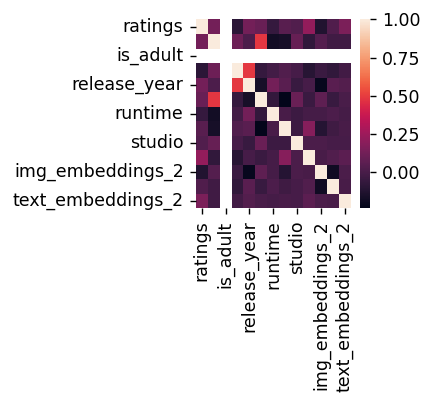

In [30]:
# After label encoding, we can examine the heatmap for corrlearion
plt.figure(figsize=(2, 2), dpi=125)
dataplot = sb.heatmap(df.corr())

In [31]:
# There is a problem about 'is_adult' column, let's look at it
df['is_adult']

0       0
1       0
2       0
3       0
4       0
       ..
3535    0
3536    0
3537    0
3538    0
3539    0
Name: is_adult, Length: 3540, dtype: int64

In [32]:
# 'is_adult' is a binary column but all of its value is zero, therefore it is going to be dropped
print(len(df[df['is_adult']==0]))

3540


In [33]:
# is_adult column is dropped 
df = df.drop('is_adult', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ratings            3540 non-null   float64
 1   n_votes            3540 non-null   float64
 2   production_year    3540 non-null   int64  
 3   release_year       3540 non-null   float64
 4   revenue            3540 non-null   float64
 5   runtime            3540 non-null   int32  
 6   genres             3540 non-null   int32  
 7   studio             3540 non-null   int32  
 8   img_embeddings_1   3540 non-null   float64
 9   img_embeddings_2   3540 non-null   float64
 10  text_embeddings_1  3540 non-null   float64
 11  text_embeddings_2  3540 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 290.5 KB


#### 3.3-) Visualizing Outliers:

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


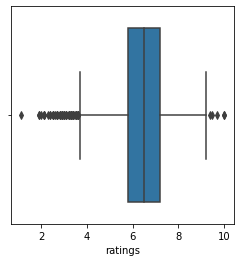

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


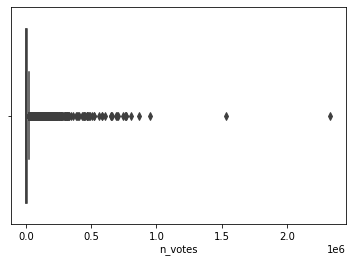

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


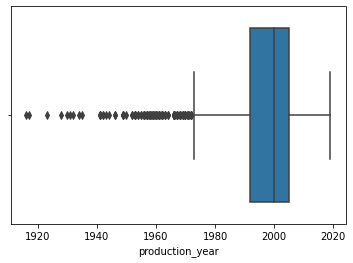

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


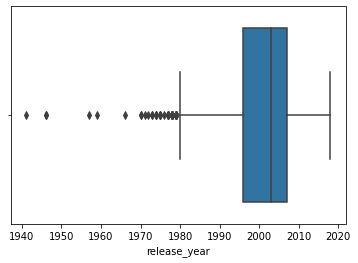

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


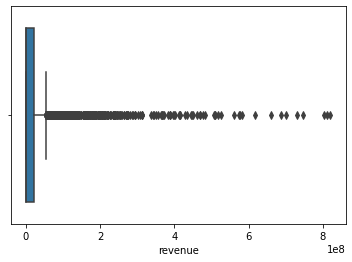

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


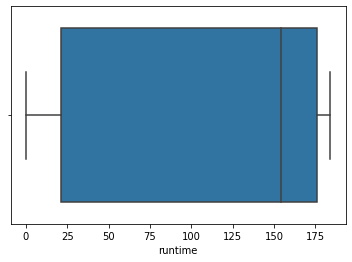

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


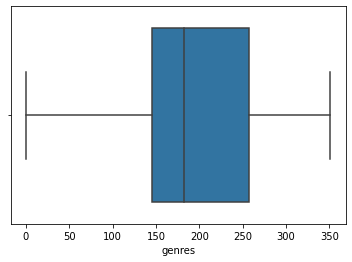

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


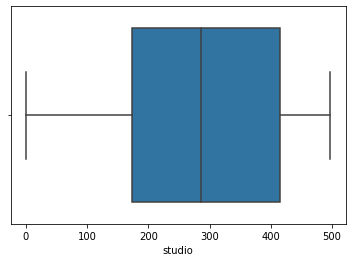

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


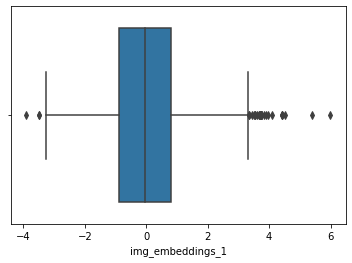

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


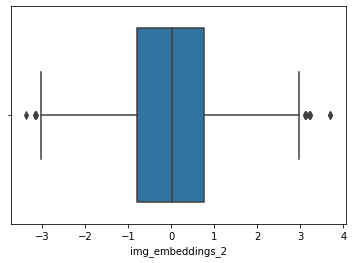

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


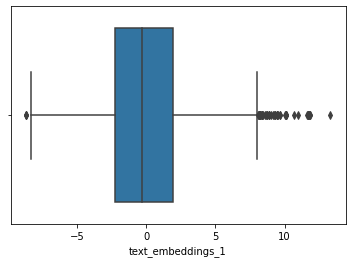

c:\Users\olgu_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


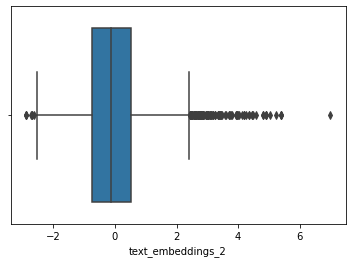

In [34]:
# Visualizing the outliers using a for loop
fig = plt.figure(figsize=(4,4))
for i in range (np.shape(df)[1]):    
    sb.boxplot(df.iloc[:,i])
    plt.show()

##### As it can be observed from visualizations, it would be not wrong to say that a model that is not very sensitive to outliers would be more succesful for this task

#### 3.4-) Feature Selection:

##### For this task I will be using both linear and non-linear machine learning models. Therefore; I will need two different dataframes, one of them for linear models and one of them for non-linear models

In [35]:
# First, take a look at correlation vector
np.abs(df.corr()['revenue'])

ratings              0.094744
n_votes              0.482573
production_year      0.059914
release_year         0.161485
revenue              1.000000
runtime              0.071382
genres               0.235498
studio               0.098783
img_embeddings_1     0.043875
img_embeddings_2     0.066286
text_embeddings_1    0.047604
text_embeddings_2    0.005375
Name: revenue, dtype: float64

##### Correlation is an important measure for linear models whereas is not important for non-linear models. I will take correlation into account while creating linear dataframe

In [36]:
# 'img_embeddings_1' and 'text_embeddings_2' seem to have relatively low correlation compared to other columns
# I have one more column for both img_embeddings and text_embeddings 
# so I can drop those two columns for linear models
df_linear = df.drop(['img_embeddings_1', 'text_embeddings_2'], axis=1)

In [37]:
# df for linear model is ready
df_linear.head()

,ratings,n_votes,production_year,release_year,revenue,runtime,genres,studio,img_embeddings_2,text_embeddings_1
0,6.5,92937.0,2010,2010.0,7.158530e+07,6,77,431,-0.894800,0.968720
1,7.9,11.0,1996,2014.0,8.964834e+04,184,30,476,-0.232166,2.145432
2,5.9,1345.0,1978,1978.0,3.164907e+07,30,262,274,-0.023910,-0.921848
3,6.6,4851.0,1994,1994.0,3.898197e+07,6,155,310,-0.093766,-2.752251
4,4.1,549.0,1982,1982.0,9.697023e+06,9,226,274,1.475944,-0.092226


##### To create non-linear dataframe, I will use mutual-information

In [38]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop(['revenue'], axis=1)
y = df["revenue"]
mutual_info = mutual_info_regression(X, y)
print(mutual_info)

[0.12067424 0.36477407 0.19344617 0.2390568  0.14593267 0.2037549
 0.47972261 0.06419688 0.06694421 0.04706651 0.06963195]


In [39]:
# mutual info for each column seems enough there is no specific column that has low mutual info
# therefore i will leave the df as is for the non-linear models

#### Dataframes are finally ready for the models!

### 4-) Applying Models:

#### 4.1-) Applying Linear Models:

In [40]:
# First, i need to split the df into train and test set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_linear = df_linear.drop(['revenue'], axis=1)
y_linear = df_linear["revenue"]
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.33, random_state=42)

##### 4.1.1-) Linear Regression:

In [41]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_linear, y_train_linear)
predictions_linear_reg = reg.predict(X_test_linear)

#### 4.2-) Applying Non-Linear Models:

In [42]:
# Splitting the df into train and test set
X = df.drop(['revenue'], axis=1)
y = df["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### 4.2.1-) KNN:

In [43]:
# Applying knn
# For knn, data needs to be scaled, because knn uses euclidean distance which depends on magnitudes

# Scaling
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train) # train data needs to be fitted and transformed
X_test_scaled = minmax.transform(X_test) # test data needs to be only transformed

# Applying the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train_scaled, y_train)
predictions_knn = knn.predict(X_test_scaled)

Text(0, 0.5, 'RMSE')

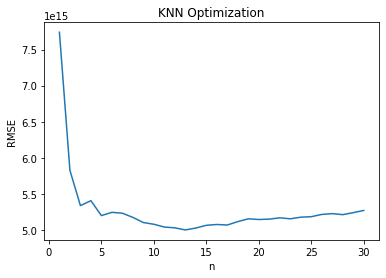

In [44]:
from sklearn.metrics import mean_squared_error

# Visualizing the success of the model depending on the n parameter
x = np.linspace(1.0, 30.0, num=30)
y = np.zeros((30))
z = np.zeros((30))

for i in range(0, 30):
    knn = KNeighborsRegressor(n_neighbors=i+1).fit(X_train_scaled, y_train)
    predictions_knn_plot = knn.predict(X_test_scaled)    
    y[i] = mean_squared_error(y_test, predictions_knn_plot)    

plt.plot(x, y)
plt.title('KNN Optimization')
plt.xlabel('n')
plt.ylabel('RMSE')

In [45]:
# let's find the best choice for n using a for loop
for i in range(0, 30):
    if y[i] == y.min():
        print("Best choice for n is {}".format(i+1))
        best_choice = (i+1)

Best choice for n is 13


In [46]:
# Let's apply the optimized model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=best_choice).fit(X_train_scaled, y_train)
predictions_knn_optimized = knn.predict(X_test_scaled)

##### 4.2.2-) MLP:

In [47]:
# Applying optimized mlp

# Hyperparameters are optimized using grid search

from sklearn.neural_network import MLPRegressor
mlp_optimized = MLPRegressor(max_iter=25000, activation='identity', learning_rate='invscaling')
mlp_optimized.fit(X_train, y_train)
predictions_mlp_optimized = mlp_optimized.predict(X_test)

##### 4.2.3-) Last Model: Random Forest

In [48]:
# Let's apply the optimized random forest model

# Hyperparameters are optimized using grid search

from sklearn.ensemble import RandomForestRegressor
forest_regressor_optimized = RandomForestRegressor(max_depth=10,min_samples_split=10, n_estimators=27,
random_state=0)
forest_regressor_optimized.fit(X_train, y_train)
predictions_rf_optimized = forest_regressor_optimized.predict(X_test)

#### 4.3-) Comparison:

In [49]:
# Let's compare succes of the models 
from sklearn.metrics import mean_squared_error, mean_absolute_error

root_mean_squared_errors = np.array([mean_squared_error(y_test, predictions_linear_reg, squared=False), 
mean_squared_error(y_test, predictions_knn_optimized, squared=False),
mean_squared_error(y_test, predictions_mlp_optimized, squared=False),
mean_squared_error(y_test, predictions_rf_optimized, squared=False)
])

mean_absolute_errors = np.array([mean_absolute_error(y_test, predictions_linear_reg),
mean_absolute_error(y_test, predictions_knn_optimized),
mean_absolute_error(y_test, predictions_mlp_optimized),
mean_absolute_error(y_test, predictions_rf_optimized)
])

In [50]:
# Printing the numerical results (scaled by a million)
print("RMSE Values for each model:")
print("--------------------------------")
print("Linear Regression: {:.2f}m".format(root_mean_squared_errors[0]/(10**6)))
print("KNN Regression: {:.2f}m".format(root_mean_squared_errors[1]/(10**6)))
print("MLP Regression: {:.2f}m".format(root_mean_squared_errors[2]/(10**6)))
print("Random Forest Regression: {:.2f}m".format(root_mean_squared_errors[3]/(10**6)))

print("\n")

print("MAE Values for each model:")
print("--------------------------------")
print("Linear Regression: {:.2f}m".format(mean_absolute_errors[0]/(10**6)))
print("KNN Regression: {:.2f}m".format(mean_absolute_errors[1]/(10**6)))
print("MLP Regression: {:.2f}m".format(mean_absolute_errors[2]/(10**6)))
print("Random Forest Regression: {:.2f}m".format(mean_absolute_errors[3]/(10**6)))

RMSE Values for each model:
--------------------------------
Linear Regression: 66.58m
KNN Regression: 70.71m
MLP Regression: 68.91m
Random Forest Regression: 59.18m


MAE Values for each model:
--------------------------------
Linear Regression: 31.16m
KNN Regression: 31.83m
MLP Regression: 32.04m
Random Forest Regression: 24.72m


(55000000.0, 75000000.0)

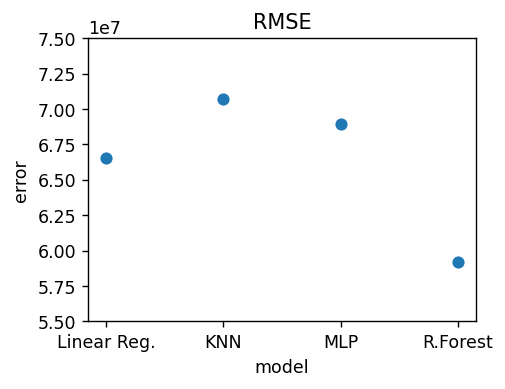

In [51]:
# Let's compare succes of the models in a graph, according to RMSE
model_names = np.array(['Linear Reg.', 'KNN', 'MLP', 'R.Forest'])

plt.figure(figsize=(4, 3), dpi=125)
plt.scatter(model_names, root_mean_squared_errors)
plt.title('RMSE')
plt.xlabel('model')
plt.ylabel('error')
plt.ylim((55*(10**6), 75*(10**6)))

(20000000.0, 40000000.0)

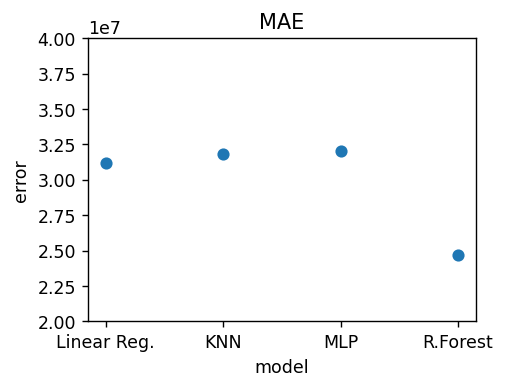

In [52]:
# Let's compare succes of the models in a graph, according to MAE
model_names = np.array(['Linear Reg.', 'KNN', 'MLP', 'R.Forest'])

plt.figure(figsize=(4, 3), dpi=125)
plt.scatter(model_names, mean_absolute_errors)
plt.title('MAE')
plt.xlabel('model')
plt.ylabel('error')
plt.ylim((20*(10**6), 40*(10**6)))

### Final: As it can be observed from the results, best model for the task is random forest regression with optimized parameters!